<a href="https://colab.research.google.com/github/raushan9jnv/Pratice-Linear-Regression-ML/blob/main/Pratice_Linear_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from numpy import math


In [408]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [409]:
path = "/content/drive/MyDrive/Almabetter/Machine Learing/50_Startups.csv"

In [410]:
dataset = pd.read_csv(path)

In [411]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [412]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [413]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [414]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [415]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [416]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [417]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

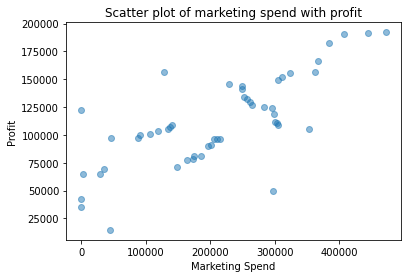

In [418]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'],alpha=0.5)
plt.title("Scatter plot of marketing spend with profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

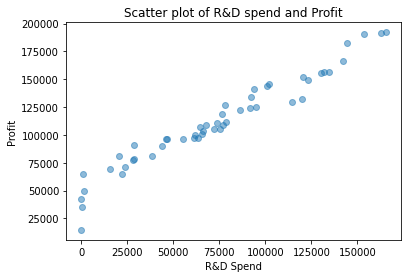

In [419]:
plt.scatter(dataset["R&D Spend"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot of R&D spend and Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

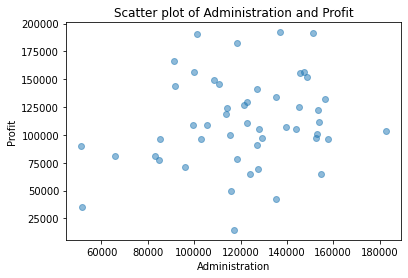

In [420]:
plt.scatter(dataset["Administration"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot of Administration and Profit")
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

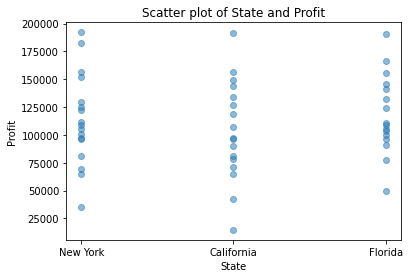

In [421]:
plt.scatter(dataset["State"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot of State and Profit")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [422]:
dataset.State.nunique()

3

In [423]:
dataset.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [424]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [425]:
x=dataset.groupby("State")
x.first()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,162597.70,151377.59,443898.53,191792.06
Florida,153441.51,101145.55,407934.54,191050.39
New York,165349.20,136897.80,471784.10,192261.83


In [426]:
x.get_group("California")

,R&D Spend,Administration,Marketing Spend,Profit
1,162597.70,151377.59,443898.53,191792.06
6,134615.46,147198.87,127716.82,156122.51
9,123334.88,108679.17,304981.62,149759.96
11,100671.96,91790.61,249744.55,144259.40
13,91992.39,135495.07,252664.93,134307.35
16,78013.11,121597.55,264346.06,126992.93
20,76253.86,113867.30,298664.47,118474.03
25,64664.71,139553.16,137962.62,107404.34
32,63408.86,129219.61,46085.25,97427.84
34,46426.07,157693.92,210797.67,96712.80


In [427]:
y=dataset.groupby(["State","Profit"])
y.first()

R&D Spend  Administration  Marketing Spend
State      Profit                                               
California 14681.40        0.00       116983.80         45173.06
           42559.73        0.00       135426.92             0.00
           65200.33    22177.74       154806.14         28334.72
           71498.49    23640.93        96189.63        148001.11
           78239.91    28754.33       118546.05        172795.67
           81005.76    38558.51        82982.09        174999.30
           89949.14    44069.95        51283.14        197029.42
           96712.80    46426.07       157693.92        210797.67
           97427.84    63408.86       129219.61         46085.25
           107404.34   64664.71       139553.16        137962.62
           118474.03   76253.86       113867.30        298664.47
           126992.93   78013.11       121597.55        264346.06
           134307.35   91992.39       135495.07        252664.93
           144259.40  100671.96        91790.61        249744.55
           149759.96  123334.88       108679.17        304981.62
           156122.51  134615.46       147198.87        127716.82
           191792.06  162597.70       151377.59        443898.53
Florida    49490.75     1315.46       115816.21        297114.46
           77798.83    27892.92        84710.77        164470.71
           90708.19    28663.76       127056.21        201126.82
           96778.92    55493.95       103057.49        214634.81
           99937.59    61994.48       115641.28         91131.24
           103282.38   66051.52       182645.56        118148.20
           105733.54   75328.87       144135.98        134050.07
           108733.99   67532.53       105751.03        304768.73
           110352.25   73994.56       122782.75        303319.26
           124266.90   91749.16       114175.79        294919.57
           132602.65  119943.24       156547.42        256512.92
           141585.52   93863.75       127320.38        249839.44
           146121.95  101913.08       110594.11        229160.95
           155752.60  130298.13       145530.06        323876.68
           166187.94  142107.34        91391.77        366168.42
           191050.39  153441.51       101145.55        407934.54
New York   35673.41      542.05        51743.15             0.00
           64926.08     1000.23       124153.04          1903.93
           69758.98    15505.73       127382.30         35534.17
           81229.06    20229.59        65947.93        185265.10
           96479.51    46014.02        85047.44        205517.64
           97483.56    61136.38       152701.92         88218.23
           101004.64   65605.48       153032.06        107138.38
           105008.31   72107.60       127864.55        353183.81
           108552.04   77044.01        99281.34        140574.81
           111313.02   78389.47       153773.43        299737.29
           122776.86   86419.70       153514.11             0.00
           125370.37   94657.16       145077.58        282574.31
           129917.04  114523.61       122616.84        261776.23
           152211.77  120542.52       148718.95        311613.29
           156991.12  131876.90        99814.71        362861.36
           182901.99  144372.41       118671.85        383199.62
           192261.83  165349.20       136897.80        471784.10

In [428]:
z=dataset.groupby(["State"])["Profit"]
z.first()

State
California    191792.06
Florida       191050.39
New York      192261.83
Name: Profit, dtype: float64

Text(0, 0.5, 'Profit')

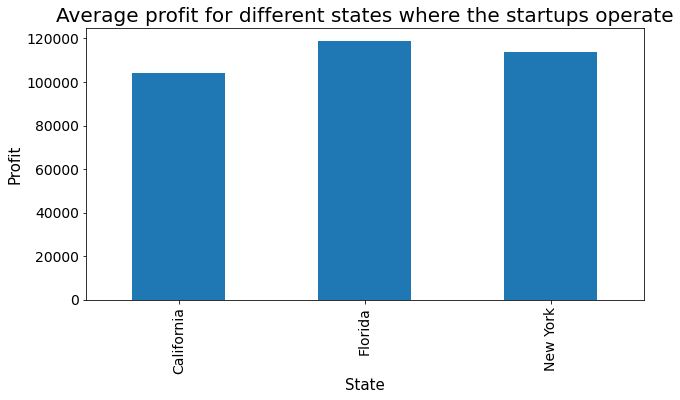

In [429]:
#Create thne figure object
ax = dataset.groupby(["State"])["Profit"].mean().plot.bar(figsize=(10,5),fontsize=14)

#set the title

ax.set_title("Average profit for different states where the startups operate", fontsize= 20)

#Set x and y-labels
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Profit", fontsize=15)


In [430]:
#dummy= pd.get_dummies(dataset["State"])
#dummy.head()

In [431]:
#new_df = pd.concat([dataset,dummy],axis=1)
#new_df.head()

In [432]:
dataset["NewYork_State"] = np.where(dataset["State"]== 'New York',1,0)
dataset["California_State"] = np.where(dataset["State"]== 'California',1,0)
dataset["Florida_State"] = np.where(dataset["State"]== 'Florida',1,0)

#Drop State column
dataset.drop('State',axis=1,inplace=True)

In [433]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [434]:
#Create dependent variable
dependent_variable = 'Profit'

In [435]:
#Create independent variable
independent_variables = list(set(dataset.columns.tolist())- {dependent_variable})

In [436]:
independent_variables

['NewYork_State',
 'R&D Spend',
 'Florida_State',
 'California_State',
 'Marketing Spend',
 'Administration']

In [437]:
#create the data of independent variables
X = dataset[independent_variables].values

#Create the data of dependent variable
Y =  dataset[dependent_variable].values

In [438]:
dataset[independent_variables].head()

,NewYork_State,R&D Spend,Florida_State,California_State,Marketing Spend,Administration
0,1,165349.20,0,0,471784.10,136897.80
1,0,162597.70,0,1,443898.53,151377.59
2,0,153441.51,1,0,407934.54,101145.55
3,1,144372.41,0,0,383199.62,118671.85
4,0,142107.34,1,0,366168.42,91391.77


In [439]:
#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0) 

In [440]:
x_train[:10]

array([[0.0000000e+00, 5.5493950e+04, 1.0000000e+00, 0.0000000e+00,
        2.1463481e+05, 1.0305749e+05],
       [1.0000000e+00, 4.6014020e+04, 0.0000000e+00, 0.0000000e+00,
        2.0551764e+05, 8.5047440e+04],
       [0.0000000e+00, 7.5328870e+04, 1.0000000e+00, 0.0000000e+00,
        1.3405007e+05, 1.4413598e+05],
       [0.0000000e+00, 4.6426070e+04, 0.0000000e+00, 1.0000000e+00,
        2.1079767e+05, 1.5769392e+05],
       [0.0000000e+00, 9.1749160e+04, 1.0000000e+00, 0.0000000e+00,
        2.9491957e+05, 1.1417579e+05],
       [0.0000000e+00, 1.3029813e+05, 1.0000000e+00, 0.0000000e+00,
        3.2387668e+05, 1.4553006e+05],
       [0.0000000e+00, 1.1994324e+05, 1.0000000e+00, 0.0000000e+00,
        2.5651292e+05, 1.5654742e+05],
       [1.0000000e+00, 1.0002300e+03, 0.0000000e+00, 0.0000000e+00,
        1.9039300e+03, 1.2415304e+05],
       [1.0000000e+00, 5.4205000e+02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.1743150e+04],
       [1.0000000e+00, 6.5605480e+04,

In [441]:
y_train[:10]

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64])

In [442]:
x_test[:]

array([[0.0000000e+00, 6.6051520e+04, 1.0000000e+00, 0.0000000e+00,
        1.1814820e+05, 1.8264556e+05],
       [0.0000000e+00, 1.0067196e+05, 0.0000000e+00, 1.0000000e+00,
        2.4974455e+05, 9.1790610e+04],
       [0.0000000e+00, 1.0191308e+05, 1.0000000e+00, 0.0000000e+00,
        2.2916095e+05, 1.1059411e+05],
       [0.0000000e+00, 2.7892920e+04, 1.0000000e+00, 0.0000000e+00,
        1.6447071e+05, 8.4710770e+04],
       [0.0000000e+00, 1.5344151e+05, 1.0000000e+00, 0.0000000e+00,
        4.0793454e+05, 1.0114555e+05],
       [1.0000000e+00, 7.2107600e+04, 0.0000000e+00, 0.0000000e+00,
        3.5318381e+05, 1.2786455e+05],
       [1.0000000e+00, 2.0229590e+04, 0.0000000e+00, 0.0000000e+00,
        1.8526510e+05, 6.5947930e+04],
       [1.0000000e+00, 6.1136380e+04, 0.0000000e+00, 0.0000000e+00,
        8.8218230e+04, 1.5270192e+05],
       [0.0000000e+00, 7.3994560e+04, 1.0000000e+00, 0.0000000e+00,
        3.0331926e+05, 1.2278275e+05],
       [0.0000000e+00, 1.4210734e+05,

In [443]:
#Transforming Data
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [444]:
x_train[:10]

array([[0.        , 0.33561668, 1.        , 0.        , 0.45494286,
        0.48655174],
       [1.        , 0.2782839 , 0.        , 0.        , 0.43561799,
        0.3173015 ],
       [0.        , 0.45557444, 1.        , 0.        , 0.28413435,
        0.87258866],
       [0.        , 0.2807759 , 0.        , 1.        , 0.44680961,
        1.        ],
       [0.        , 0.55488118, 1.        , 0.        , 0.62511553,
        0.59103645],
       [0.        , 0.7880179 , 1.        , 0.        , 0.68649342,
        0.88568959],
       [0.        , 0.72539353, 1.        , 0.        , 0.54370828,
        0.98922572],
       [1.        , 0.0060492 , 0.        , 0.        , 0.0040356 ,
        0.6847981 ],
       [1.        , 0.00327821, 0.        , 0.        , 0.        ,
        0.00432296],
       [1.        , 0.39676926, 0.        , 0.        , 0.22709197,
        0.95618996]])

In [445]:
x_test[:10]

array([[0.        , 0.39946683, 1.        , 0.        , 0.25042853,
        1.23448414],
       [0.        , 0.60884455, 0.        , 1.        , 0.52936195,
        0.38067074],
       [0.        , 0.61635061, 1.        , 0.        , 0.48573267,
        0.55737746],
       [0.        , 0.16869099, 1.        , 0.        , 0.34861436,
        0.31413763],
       [0.        , 0.92798459, 1.        , 0.        , 0.8646636 ,
        0.4685842 ],
       [1.        , 0.43609283, 0.        , 0.        , 0.74861321,
        0.71967718],
       [1.        , 0.12234465, 0.        , 0.        , 0.39269043,
        0.13781301],
       [1.        , 0.36974101, 0.        , 0.        , 0.18698856,
        0.95308746],
       [0.        , 0.4475048 , 1.        , 0.        , 0.64291963,
        0.67192074],
       [0.        , 0.85943772, 1.        , 0.        , 0.77613557,
        0.37692262]])

In [446]:
#Fitting Multiple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [447]:
#LinearRegression().fit(x_train,y_train)

In [448]:
regressor.intercept_

44153.95466784861

In [449]:
regressor.coef_

array([ 7.86007422e+02,  1.27892182e+05, -8.72645791e+02,  8.66383692e+01,
        1.72720281e+04,  3.49927567e+03])

In [450]:
y_pred_train = regressor.predict(x_train)

In [451]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [452]:
#predicting the test set result
y_pred =regressor.predict(x_test)

In [453]:
#predicting profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [454]:
#Actual profit on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [458]:
mean_squared_error(y_test,y_pred)

83502864.03257728

In [461]:
#Train Performance
math.sqrt(mean_squared_error(y_train,y_pred_train))

9031.666612578969

In [462]:
#Test performance
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794939

In [465]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [466]:
r2_score(y_test,y_pred)

0.9347068473282426